# Advanced reference: using exhaustive captures

<div class="admonition important alert alert-block alert-warning">

This is an advanced showcase, thus its documentation is scarce. If you're especially interested, feel free to reach out to us.

Also the bunny example we show here is not the best example for exhaustive captures, but showcases the full working reconstruction pipeline.

</div>

In [18]:
import tal
print('Executed using tal version:', tal.__version__)

# If you want to follow this tutorial,
# you need to first obtain this file, either by running
# the corresponding `render` tutorial, or by downloading it
# (see the top-level README on the examples/ folder)
filename = 'data/tal/bunny-exhaustive-2x2x64x64.hdf5'

data = tal.io.read_capture(filename)

Executed using tal version: 0.21.0


In [19]:
tal.reconstruct.compensate_laser_cos_dsqr(data)

In [25]:
import numpy as np
# res = 1 / 64
# volume_xyz = tal.reconstruct.get_volume_min_max_resolution(
#     minimal_pos=np.array([-1.0, -1.0, 1.0-res/2]), maximal_pos=np.array([1.0, 1.0, 1.0+res/2]), resolution=res,
# )
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=np.linspace(0.8, 1.2, 5))
print(volume_xyz.shape)

(64, 64, 5, 3)


tal.reconstruct.filter_H: Using wavelengths from 0.1327m to 0.4222m


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]


tal.reconstruct.utils: Assuming that volume_xyz is X_Y_3
tal.reconstruct.filter_H: Using wavelengths from 0.1327m to 0.4222m


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]


tal.reconstruct.utils: Assuming that volume_xyz is X_Y_3
tal.reconstruct.filter_H: Using wavelengths from 0.1327m to 0.4222m


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]


tal.reconstruct.utils: Assuming that volume_xyz is X_Y_3
tal.reconstruct.filter_H: Using wavelengths from 0.1327m to 0.4222m


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]


tal.reconstruct.utils: Assuming that volume_xyz is X_Y_3
tal.reconstruct.filter_H: Using wavelengths from 0.1327m to 0.4222m


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]


tal.reconstruct.utils: Assuming that volume_xyz is X_Y_3


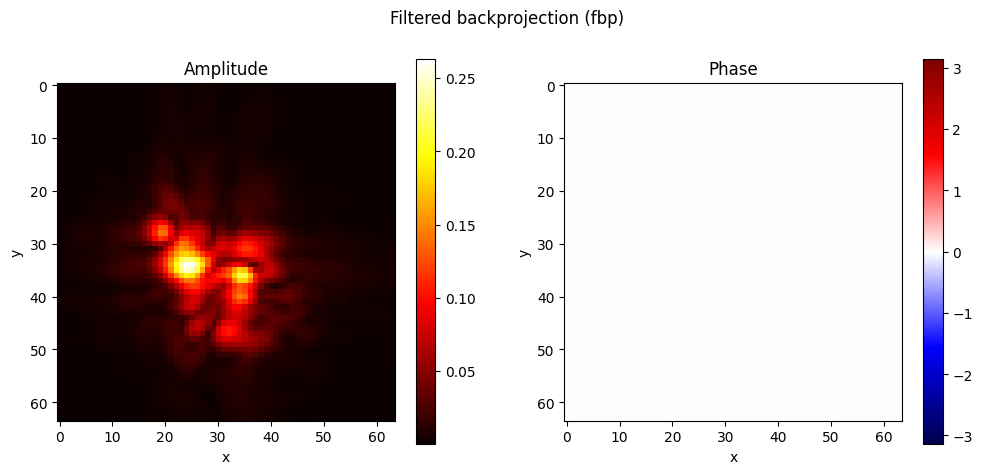

In [28]:
nvx, nvy, nvz, _ = volume_xyz.shape
H_1 = np.zeros((nvx, nvy, nvz), dtype=np.complex64)
for i in range(nvz):
    H_1[..., i] = tal.reconstruct.fbp.solve(data,
                                    wl_mean=0.20, wl_sigma=0.20,
                                    volume_xyz=volume_xyz[..., i, :], camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(np.max(np.abs(H_1), axis=-1), title='Filtered backprojection (fbp)')